In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [94]:
df = pd.read_csv("data/weather_train.csv",sep=',')
df

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [ ]:
"""Quante sono le istanze contenute nel dataset?"""

In [ ]:
print(f'Number of istances: {df.shape[0]}')

In [ ]:
"""Il dataset è completo (cioè per ogni istanza tutti i valori di attributo sono sempre correttamente specificati – non esistono “missing
values”)?"""

In [ ]:
print(f'Is there any missing values: {df.isna().any().any()}')

In [ ]:
"""Il dataset è bilanciato per quanto riguarda la classe da predire?"""

weather_main
clear     77750
clouds    64130
rain      16251
dtype: int64
clear     77750
clouds    64130
rain      16251
Name: weather_main, dtype: int64


<Axes: xlabel='weather_main', ylabel='count'>

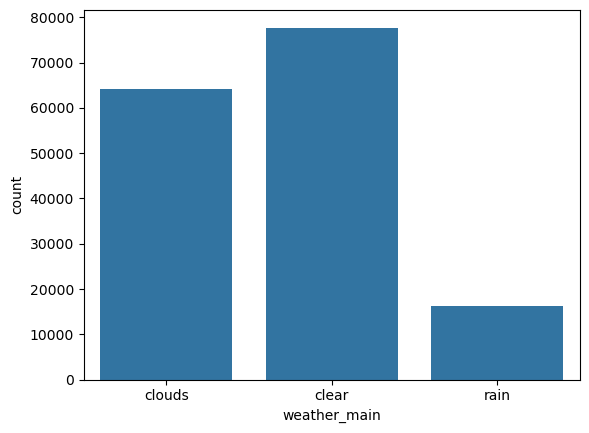

In [98]:
# print(df.groupby(["weather_main"]).size())
print(df["weather_main"].value_counts())
sns.countplot(df, x = "weather_main")

In [ ]:
"""2. Le rilevazioni con pressione e umidità uguale a 0 sono irreali. Quante sono queste rilevazioni?
Eliminarle dal dataset (punti 1)"""

In [99]:
print(f'Rilevazioni irreali: {df[(df["pressure"] == 0) | (df['humidity'] == 0)].shape[0]}')
df = df[~((df["pressure"] == 0) | (df['humidity'] == 0))]
df

Rilevazioni irreali: 61


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2016-05-26 09:00:00+02:00,Bilbao,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,75,803,clouds,broken clouds,04d
1,2016-07-16 10:00:00+02:00,Madrid,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0,800,clear,sky is clear,01d
2,2018-06-03 05:00:00+02:00,Madrid,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,56,803,clouds,broken clouds,04n
3,2018-10-19 10:00:00+02:00,Valencia,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,75,521,rain,shower rain,09d
4,2017-11-25 07:00:00+01:00,Seville,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158126,2016-08-01 10:00:00+02:00,Madrid,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0,800,clear,sky is clear,01d
158127,2017-10-12 00:00:00+02:00,Barcelona,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0,800,clear,sky is clear,01n
158128,2015-11-09 16:00:00+01:00,Bilbao,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0,800,clear,sky is clear,01
158129,2016-02-25 05:00:00+01:00,Valencia,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0,800,clear,sky is clear,01


In [104]:
"""3. Analizzare la temperatura massima rilevata. Valutare se la distribuzione dei valori assume un
andamento simile a una gaussiana. Considerare poi le rilevazioni che si collocano all’interno del
5% delle temperature più alte. Le città sono equamente presenti in quella fascia di rilevazioni?
Come è il tempo complessivo nei giorni in cui la temperatura massima è in quella fascia per ogni
città? (punti 4)"""


0         290.930
1         299.037
2         285.150
3         289.150
4         281.150
           ...   
158126    305.050
158127    294.150
158128    292.810
158129    285.220
158130    287.761
Name: temp_max, Length: 158070, dtype: float64

In [ ]:
max_temps = df.temp_max
max_temps

<Axes: xlabel='temp_max', ylabel='Count'>

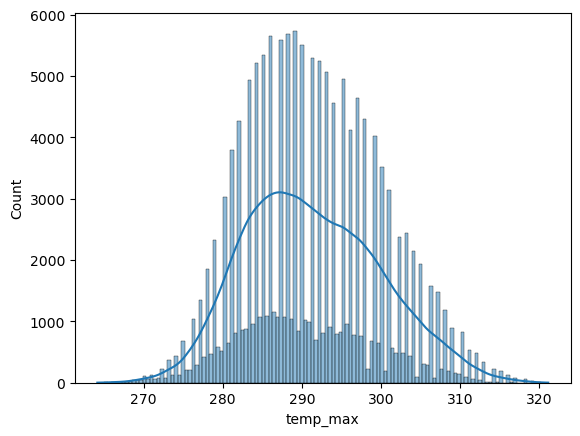

In [106]:
sns.histplot(max_temps, kde=True)

In [107]:
top5_temps = df[max_temps >= max_temps.quantile(0.95)]

<Axes: xlabel='city_name'>

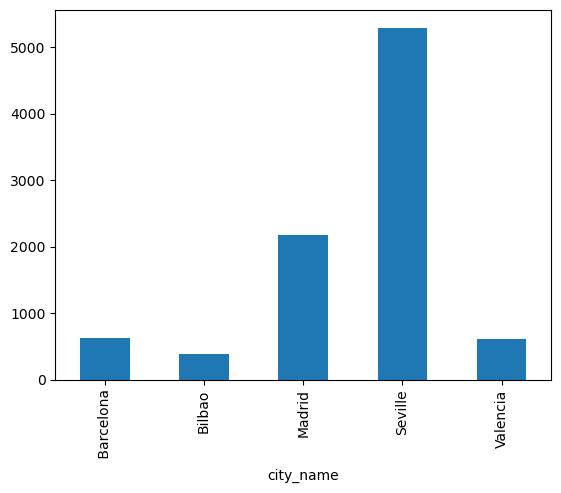

In [108]:
top5_temps.groupby('city_name').size().plot.bar()

<Axes: xlabel='city_name'>

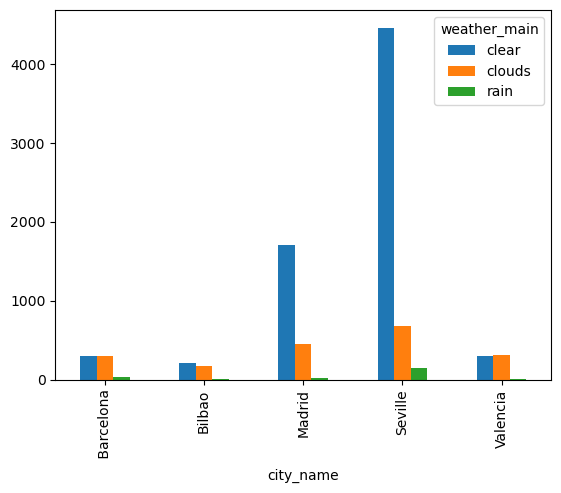

In [109]:
top5_temps.groupby(['city_name','weather_main']).size().unstack().plot.bar()

In [ ]:
"""4. Verificare se quando nevica la temperatura sia prossima alla temperatura di congelamento
(NOTA: il dataset riporta i valori in Kelvin) (punti 2)"""

<Axes: >

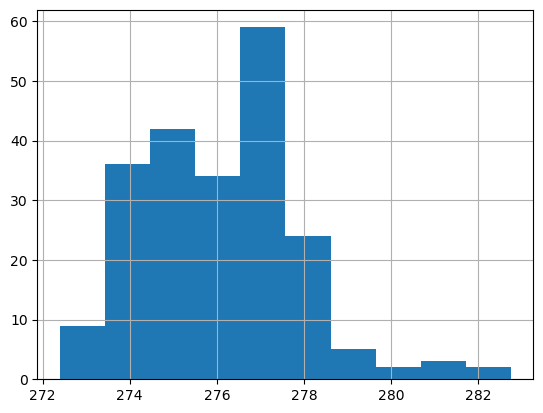

In [110]:
df[df.snow_3h > 0].temp.hist()

In [111]:
df[df.snow_3h > 0].temp.mean() 

276.1187510127315

In [ ]:
print("Quando nevica, in media, la temperatura è solo 3 gradi Kelvin superiore a quella di congelamento")

In [ ]:
"""5. Confrontare l’escursione termica media (temp_max-temp_min) registrata nei giorni in cui
nevica, con quella delle giornate che sono all’interno del 5% delle temperature più alte (punti
2)"""


In [115]:
snow = df[df.snow_3h > 0]
temperature_range = snow["temp_max"] - snow["temp_min"] 
temperature_range.mean()


0.0

In [116]:
temperature_range = top5_temps["temp_max"] - top5_temps["temp_min"] 
temperature_range.mean()

7.372107111501317

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
"""1. Si vuole predire il valore di 'weather_main' sulla base degli attributi presenti nel dataset.
Dividere il dataset in modo che 2/3 degli elementi siano contenuti in un nuovo dataset “train” e
1/3 nel dataset “test”.
Eliminare gli attributi ["dt_iso","city_name","weather_description", "weather_icon","weather_id",
"clouds_all"]
Convertire l’attributo 'weather_main' in numerico in maniera opportuna.
Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello Logistic Regression. Effettuare alcune considerazioni sui risultati
ottenuti, tenendo in considerazione anche l’analisi della confusion matrix. (punti 4)"""

In [ ]:
df = df.drop(columns=["dt_iso","city_name","weather_description", "weather_icon","weather_id","clouds_all"])
df


In [ ]:
enc = preprocessing.OrdinalEncoder()
df["weather_main"] = enc.fit_transform(pd.DataFrame(df['weather_main']))
df

In [ ]:
y = df["weather_main"]
y

In [ ]:
X = df.loc[:,'temp':'snow_3h']
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [ ]:
# Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

result = dt.predict(X_test)
print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, dt.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,result)}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

result = lr.predict(X_test)
print("Accuracy with logistic regression:")
print(f'accuracy on train: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,result )}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

In [ ]:
"""2. Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza che si ottiene con
un una 10 Fold cross validation. (punti 1)"""

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()

print(f'Average accuracy on Decision Tree with 10 Fold cross validation: {cross_val_score(dt,X, y, cv=10).mean()}')
print(f'Average accuracy on Logistic Regression with 10 Fold cross validation: {cross_val_score(lr,X, y, cv=10).mean()}')

In [ ]:
"""3. Utilizzare la funzione Normalizer per normalizzare i valori del dataset e confrontare se
l’accuratezza ottenuta con il Decision Tree Classifier migliora (punti 3)."""

In [ ]:
normalizer = preprocessing.Normalizer()

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)


In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

result = dt.predict(X_test)
print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, dt.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,result)}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

In [ ]:
print("L'accuretezza è leggermente peggiorata")

In [ ]:
"""
4. Creare una pipeline con trasformatori PCA (si scelgano 5 attributi) e poi Normalizer. Si usi
come modello il Decision Tree Classifier (punti 2) [2 punti ulteriori se gli attributi della PCA
sono aggiunti agli attributi del dataset]"""

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion, FunctionTransformer

In [89]:
df_copy = df.copy()
df_copy


,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,weather_main
0,288.420,285.150,290.930,1012,93,0,0,0.0,0.0,0.0,1.0
1,299.037,299.037,299.037,961,44,2,83,0.0,0.0,0.0,0.0
2,285.150,285.150,285.150,1017,100,0,0,0.0,0.0,0.0,1.0
3,289.150,289.150,289.150,1011,100,4,320,0.9,0.0,0.0,2.0
4,279.940,279.150,281.150,1019,81,0,50,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
158126,297.760,293.710,305.050,1021,56,2,30,0.0,0.0,0.0,0.0
158127,292.830,291.150,294.150,1024,88,0,280,0.0,0.0,0.0,0.0
158128,292.810,292.810,292.810,1031,62,1,25,0.0,0.0,0.0,0.0
158129,285.220,285.220,285.220,1012,60,4,265,0.0,0.0,0.0,0.0


In [90]:
y = df["weather_main"]
X = df.loc[:,'temp':'snow_3h']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [91]:

model_pipeline = DecisionTreeClassifier()

def identity_func(X):
  return X

combined = FeatureUnion([("pca", PCA(n_components=5)),('passtrough',FunctionTransformer(identity_func,validate=False))])
#creo 5 colonne con pca unite al dataset originale, tramite una funzione identità con FunctionTransformer

preprocessing_transformer = Pipeline(steps=[('pca',combined ),
                                            ('normalizer', preprocessing.Normalizer())
                                             ])

my_pipeline = Pipeline(steps=[('preprocessing',preprocessing_transformer),
                              ('model',model_pipeline)])

my_pipeline

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('pca',
                                  FeatureUnion(transformer_list=[('pca',
                                                                  PCA(n_components=5)),
                                                                 ('passtrough',
                                                                  FunctionTransformer(func=<function identity_func at 0x7dbcf20fac00>))])),
                                 ('normalizer', Normalizer())])),
                ('model', DecisionTreeClassifier())])

In [92]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)
 
accuracy_score(y_test, preds)

0.6937071958414752

In [ ]:
"""5. Utilizzare la funzione di gridSearchCV sulla pipeline per modificare il numero di attributi
selezionati dalla PCA e alcuni parametri a piacere del classificatore. Verificare se l’accuratezza
che si ottiene con la nuova configurazione supera quella standard ottenuta al punto 1 (punti 4)"""

In [ ]:
from sklearn.model_selection import GridSearchCV

In [93]:
dt = DecisionTreeClassifier()
parameters = {
    'preprocessing__pca__pca__n_components': [2,5,10],
    'model__criterion': ['gini', 'entropy'],
    'model__min_samples_split': [1,3,5]
}

clf = GridSearchCV(my_pipeline, parameters, cv=10, n_jobs=-1, scoring= 'accuracy')
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
clf.best_params_

In [ ]:
my_pipeline.set_params(**clf.best_params_)

In [ ]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)
 
accuracy_score(y_test, preds)

In [ ]:
"""
6. Si verifichi l’accuratezza ottenuta dalla pipeline del punto 4 con il file weather_test. I
risultati corretti sono nel file class.csv. Controllare le features presenti nei dataset. (punti 2)"""

In [81]:
df = pd.read_csv("data/weather_train.csv",sep=',')
df = df.drop(columns=["dt_iso","city_name","weather_description", "weather_icon","weather_id","clouds_all"])
enc = preprocessing.OrdinalEncoder()
df["weather_main"] = enc.fit_transform(pd.DataFrame(df['weather_main']))
X = df.loc[:,'temp':'snow_3h']
y = df['weather_main']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [83]:
df_test = pd.read_csv("data/weather_test.csv",sep=',')
df_test

,Unnamed: 0,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_description,weather_icon
0,0,2015-10-23 18:00:00+02:00,Madrid,293.150,293.150,293.150,1019,45,2,200,0.0,0.0,0.0,0,800,sky is clear,01d
1,1,2015-01-01 06:00:00+01:00,Madrid,265.442,265.442,265.442,972,64,0,240,0.0,0.0,0.0,0,800,sky is clear,01n
2,2,2015-07-24 22:00:00+02:00,Madrid,302.870,301.050,304.150,1012,29,6,290,0.0,0.0,0.0,0,800,sky is clear,01n
3,3,2015-05-27 22:00:00+02:00,Madrid,291.944,291.944,291.944,956,34,3,29,0.0,0.0,0.0,0,800,sky is clear,01n
4,4,2015-07-06 18:00:00+02:00,Madrid,312.540,310.650,313.150,1017,11,5,220,0.0,0.0,0.0,20,801,few clouds,02d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2016-11-15 09:00:00+01:00,Seville,290.060,282.150,300.150,1024,81,4,70,0.0,0.0,0.0,0,800,sky is clear,01d
9996,9996,2017-12-03 04:00:00+01:00,Seville,276.540,276.150,277.150,1025,86,0,0,0.0,0.0,0.0,0,800,sky is clear,01n
9997,9997,2016-05-23 22:00:00+02:00,Valencia,289.190,287.590,291.150,1020,63,3,70,0.0,0.0,0.0,0,800,sky is clear,01n
9998,9998,2018-06-19 09:00:00+02:00,Seville,292.110,290.150,295.150,1018,64,1,348,0.0,0.0,0.0,0,800,sky is clear,01d


In [84]:
df_test = df_test.iloc[:,1:17]
df_test = df_test.drop(columns=["dt_iso","city_name","weather_description", "weather_icon","weather_id","clouds_all"])

In [85]:
target = pd.read_csv("data/class.csv",sep=',')
target = target.iloc[:,1:2]
target

,weather_main
0,clear
1,clear
2,clear
3,clear
4,clouds
...,...
9995,clear
9996,clear
9997,clear
9998,clear


In [86]:
enc = preprocessing.OrdinalEncoder()
target["weather_main"] = enc.fit_transform(pd.DataFrame(target['weather_main']))
target

,weather_main
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [87]:
model_pipeline = DecisionTreeClassifier()
preprocessing_transformer = Pipeline(steps=[('pca', PCA(n_components=5)),
                                            ('normalizer', preprocessing.Normalizer())
                                             ])

my_pipeline = Pipeline(steps=[('preprocessing',preprocessing_transformer),
                              ('model',model_pipeline)])

my_pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('pca', PCA(n_components=5)),
                                 ('normalizer', Normalizer())])),
                ('model', DecisionTreeClassifier())])

In [88]:
preds = my_pipeline.predict(df_test)
 
accuracy_score(target, preds)

0.5617

In [ ]:
"""
7. Si sperimenti una pipeline come quella del punto 4 dove al posto del classificatore si utilizzi
un regressore lineare. Il risultato dovrà essere approssimato all’intero per il calcolo
dell’accuratezza (punti 2)."""

In [ ]:
df_copy = df.copy()
df_copy

In [ ]:
y = df["weather_main"]
X = df.loc[:,'temp':'snow_3h']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [ ]:
model_pipeline = LinearRegression()
preprocessing_transformer = Pipeline(steps=[('pca', PCA(n_components=5)),
                                            ('normalizer', preprocessing.Normalizer())
                                             ])

my_pipeline = Pipeline(steps=[('preprocessing',preprocessing_transformer),
                              ('model',model_pipeline)])

my_pipeline

In [ ]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)
 
accuracy_score(y_test, np.round(preds))